In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
print(torch.__version__)

2.6.0+cu124


In [5]:
## Tensors
scalar = torch.tensor(7)
scalar

tensor(7)

In [6]:
scalar.ndim # scalers has no dimension

0

In [7]:
scalar.item() # get the int of tensor

7

In [8]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [9]:
vector.ndim

1

In [10]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [11]:
MATRIX.ndim

2

In [12]:
MATRIX.shape

torch.Size([2, 2])

In [14]:
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [15]:
TENSOR.ndim

3

In [16]:
TENSOR.shape

torch.Size([1, 3, 3])

In [23]:
print(f"{TENSOR[0]}, {TENSOR[0][0]}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]), tensor([1, 2, 3])


In [24]:
# Random Tensors
# Important because NNs start with random weights which are tensors that are random
random_tensor = torch.rand(3, 4) # creates a tensor 3x4
random_tensor

tensor([[0.0428, 0.9510, 0.4700, 0.3335],
        [0.8932, 0.0031, 0.1176, 0.3239],
        [0.9321, 0.5030, 0.2208, 0.3978]])

In [26]:
random_tensor.ndim

2

In [27]:
random_tensor.shape

torch.Size([3, 4])

In [28]:
# Create a random tensor with similar shape to an image tensor

random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

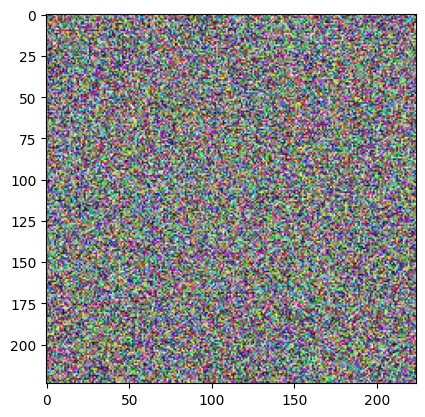

In [30]:
plt.imshow(random_image_size_tensor)

In [32]:
# Zero and One tensor
zeros = torch.zeros(size=(3, 4))
ones  = torch.ones(size=(3, 4))
zeros, ones

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]))

In [37]:
# Create range of tensors and tensors-like
# torch.range deprecated use torch.arange
zero_to_ten_tensor = torch.arange(0, 10)

In [40]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=zero_to_ten_tensor)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# Datatypes
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # Datatype of tensor
                               device=None, # cpu or cuda
                               requires_grad=False # track gradients
                               )
float_32_tensor

tensor([3., 6., 9.])

In [43]:
float_16_tensor = float_32_tensor.type(torch.float16)

In [45]:
# Tensor Operations

tensor = torch.tensor([1, 2, 3])
tensor = tensor + 10
tensor

tensor([11, 12, 13])

In [47]:
tensor = tensor / 10
tensor

tensor([0.1100, 0.1200, 0.1300])

In [49]:
tensor = tensor * 21
tensor

tensor([48.5100, 52.9200, 57.3300])

In [51]:
tensor = tensor - 7
tensor

tensor([34.5100, 38.9200, 43.3300])

In [54]:
## Matrix Multiplication
# Element-wise multiplication
tensor = torch.tensor([1, 2, 3])
print(tensor, "*", tensor)
print("=", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
= tensor([1, 4, 9])


In [55]:
# Matrix Multiplication
res = torch.matmul(tensor, tensor)
print(tensor, ".", tensor)
print("=", res)

tensor([1, 2, 3]) . tensor([1, 2, 3])
= tensor(14)


In [59]:
# Inner dimensions should match for matrix multiplication
# a multiplication between 2x3 and 3x2 matrix gives 2x2 matrix as output
torch.matmul(torch.rand(size=(2,3)),
             torch.rand(size=(3,2)))

tensor([[1.1294, 1.2880],
        [0.9881, 1.0473]])

In [66]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])
tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.matmul will give error if we multiply these to
# since both of the matrices are 3x2
# after reshaping the output will be a 3x3 matrix

In [73]:
tensor_B = tensor_B.T # Transposing can also be used in this scenario and probably it is the right way to do

In [74]:
reshaped_tensor_B = tensor_B.reshape(shape=(2, 3))

In [75]:
torch.mm(tensor_A, reshaped_tensor_B)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [76]:
torch.mm(tensor_A, tensor_B)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [77]:
# Finding min, max, sum etc.

x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [78]:
torch.max(x), x.max()

(tensor(90), tensor(90))

In [79]:
torch.min(x), x.min()

(tensor(0), tensor(0))

In [88]:
# torch.mean requires float32
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [90]:
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [92]:
# Positional min max

x.argmin(), x.argmax()

(tensor(0), tensor(9))

In [97]:
x_stacked = torch.stack([x, x, x, x, x])
x_stacked, x_stacked.shape, x_stacked.ndim

(tensor([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
         [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
         [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
         [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
         [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]),
 torch.Size([5, 10]),
 2)

In [98]:
x_hstacked = torch.hstack([x, x, x, x, x])
x_hstacked, x_hstacked.shape, x_hstacked.ndim

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90,  0, 10, 20, 30, 40, 50, 60, 70,
         80, 90,  0, 10, 20, 30, 40, 50, 60, 70, 80, 90,  0, 10, 20, 30, 40, 50,
         60, 70, 80, 90,  0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 torch.Size([50]),
 1)

In [99]:
x_squeezed = x_hstacked.squeeze()
x_squeezed, x_squeezed.shape, x_squeezed.ndim

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90,  0, 10, 20, 30, 40, 50, 60, 70,
         80, 90,  0, 10, 20, 30, 40, 50, 60, 70, 80, 90,  0, 10, 20, 30, 40, 50,
         60, 70, 80, 90,  0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 torch.Size([50]),
 1)

In [100]:
x_org = torch.rand(size=(224, 224, 3))
x_permuted = x_org.permute(2, 0, 1)


In [102]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

In [104]:
torch.manual_seed(RANDOM_SEED)
random_tensor = torch.rand(3, 4)
torch.manual_seed(RANDOM_SEED)
random_tensor_A = torch.rand(3,4)
random_tensor, random_tensor_A, random_tensor == random_tensor_A

(tensor([[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]]),
 tensor([[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]]),
 tensor([[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]))

In [105]:
# Device Agnostic Code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [109]:
tensor = torch.tensor([1, 2, 3], dtype=torch.float32,
                      device=device, requires_grad=False)
tensor

tensor([1., 2., 3.])

In [112]:
tensor.to("cuda") # when cuda is activated this will work

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx